In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# 載入資料集

In [2]:
x, y = load_iris(return_X_y=True)
print(x.shape)
print(y.shape)

(150, 4)
(150,)


# 顯示資料分佈

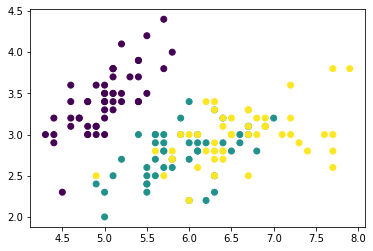

In [3]:
plt.scatter(x[:, 0], x[:, 1], c=y) # 特徵共有4維 僅用前2維作圖

# 主要算法實現

In [4]:
class PrincipalComponentAnalysis:
    """https://www.bilibili.com/video/BV1PJ411G74g?p=3"""
    """http://blog.codinglabs.org/articles/pca-tutorial.html"""
    def __init__(self, n_components):
        # 降至幾維
        self.n_components = n_components
    
    def fit(self, x):
        self.mean = x.mean(axis=0)
        x = x - self.mean
        cov = np.cov(x.T)
        eigvalues, eigvetors = np.linalg.eig(cov)
        idx = eigvalues.argsort()[::-1]
        self.components = eigvetors.T[idx][:self.n_components]
        
    def transform(self, x):
        x = x - self.mean
        # 以(特徵數, 樣本數)形式 變換至新基後 再轉回(樣本數, 特徵數)形式
        return np.dot(self.components, x.T).T

In [5]:
pca = PrincipalComponentAnalysis(n_components=2)
pca.fit(x)

# 降維資料集

In [6]:
projected = pca.transform(x)
print(x.shape)
print(projected.shape)

(150, 4)
(150, 2)


# 顯示降維分佈

Text(0, 0.5, 'Principal Component 2')

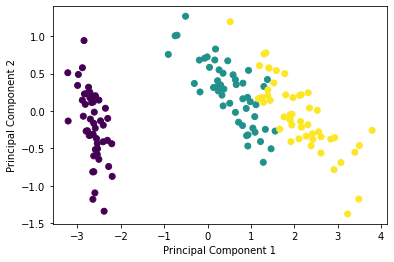

In [7]:
plt.scatter(projected[:, 0], projected[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')